In [5]:
!C:\Users\ivanx\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip

  Using cached pip-24.3.1-py3-none-any.whl.metadata (3.7 kB)
Using cached pip-24.3.1-py3-none-any.whl (1.8 MB)


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [45]:
!pip install pandas plotly numpy matplotlib wordcloud jinja2 seaborn scikit-learn

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.1 MB 1.3 MB/s eta 0:00:09
   -- ------------------------------------- 0.8/11.1 MB 1.6 MB/s eta 0:00:07
   --- ------------------------------------ 1.0/11.1 MB 1.7 MB/s eta 0:00:07
   --- ------------------------------------ 1.0/11.1 MB 1.7 MB/s eta 0:00:07
   ----- ---------------------------------- 1.6/11.1 MB 1.3 MB/s eta 0:00:08
   ------ --------------------------------- 1.8/11.1 MB 1.3 MB/s eta 0:00:07
   ------- -------------------------------- 2.1/11.1 MB 1.3 MB/s eta 0:00:07
   -------- ------------------------------- 2.4/11.1 MB 1.3 MB/s eta 0:00:07
   --------- ------------------------------ 2.6/11.1 MB 1.3 MB/s eta 0:00:07
   --------- ------------------------------ 2.6/11.1 MB 1.3 MB/s eta 0:00:07
   --------- ------------------------------ 2.6/11.1 MB 1.3 MB/s eta 0:00:07
   ----------

In [2]:
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
import pandas as pd 
import numpy as np
import plotly.express as px
%matplotlib inline

# Seu Título

<p align="center">
  <img src="./img/image_1.jpg" alt="" width="400" height="300">
</p>

## Introdução
Aqui você pode começar a escrever o conteúdo do seu README...

In [8]:
# Importa as bibliotecas necessárias
import pandas as pd

# Carrega os datasets
netflix = pd.read_csv("./Datasets/netflix_titles.csv")
disney = pd.read_csv("./Datasets/disney_plus_titles.csv")
apple = pd.read_csv("./Datasets/apple_titles.csv")
amazon = pd.read_csv("./Datasets/amazon_prime_titles.csv")

# Adiciona a informação da plataforma
netflix['platform'] = 'Netflix'
disney['platform'] = 'Disney+'
apple['platform'] = 'AppleTV'
amazon['platform'] = 'AmazonPrime'

# Concatena os datasets
df_all = pd.concat([netflix, disney, apple, amazon], ignore_index=True)

# Divide os géneros em linhas individuais
genres = df_all['listed_in'].str.split(',', expand=True).stack().reset_index(level=1, drop=True)
genres.name = 'genre'

# Junta os géneros processados ao dataset original
final_df = df_all.drop(columns=['listed_in']).join(genres)

# Exibe uma amostra do dataset integrado
final_df.head()

# Salva como arquivo temporário (opcional, apenas para debugging)
# final_df.to_csv("integrated_genres_debug.csv", index=False)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Documentaries
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,International TV Shows
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TV Dramas
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TV Mysteries
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Crime TV Shows


In [9]:
netflix=pd.read_csv("./Datasets/netflix_titles.csv")
print('the size of netflix data is {}'.format(netflix.shape))
netflix.head()

the size of netflix data is (8807, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [10]:
disney=pd.read_csv("./Datasets/disney_plus_titles.csv")
print('the size of disney data is {}'.format(disney.shape))
disney.head()

the size of disney data is (1450, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


In [11]:
amazon=pd.read_csv("./Datasets/netflix_titles.csv")
print('the size of netflix data is {}'.format(netflix.shape))
netflix.head()

the size of netflix data is (8807, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [12]:
netflix['platform'] = 'netflix'
disney['platform']  = 'disney'
amazon['platform']  = 'amazon'
apple['platform']  = 'apple'

In [13]:
df_all = pd.concat([netflix, disney, amazon, apple])

In [9]:
# Data cleaning
df_all['duration'] = np.where(df_all['rating']=='74 min','74 min', df_all['duration'])
df_all['duration'] = np.where(df_all['rating']=='84 min','84 min', df_all['duration'])
df_all['duration'] = np.where(df_all['rating']=='66 min','66 min', df_all['duration'])

df_all['rating'] = np.where(df_all['rating']=='74 min', 'Nan', df_all['rating'])
df_all['rating'] = np.where(df_all['rating']=='84 min', 'Nan', df_all['rating'])
df_all['rating'] = np.where(df_all['rating']=='66 min', 'Nan', df_all['rating'])

# Normalização das classificações etárias
def normalize_rating(rating):
    rating_map = {
        '13+': 'PG-13', '16+': 'TV-14', '18+': 'R', 'R': 'R', 'TV-NR': 'NR',
        'PG-13': 'PG-13', 'NR': 'NR', 'PG': 'PG', 'UNRATED': 'UNRATED', 'ALL': 'G',
        'G': 'G', 'TV-MA': 'TV-MA', 'TV-14': 'TV-14', 'TV-PG': 'TV-PG', 'TV-G': 'G',
        'TV-Y': 'TV-Y', 'TV-Y7': 'TV-Y7', 'TV-PG': 'TV-PG', 'TV-14': 'TV-14', 'TV-MA': 'TV-MA',
    }
    return rating_map.get(rating, rating)

df_all['rating'] = df_all['rating'].apply(normalize_rating)

# Caso também tenha uma coluna 'age_certification' em df_all
if 'age_certification' in df_all.columns:
    df_all['age_certification'] = df_all['age_certification'].apply(normalize_rating)


In [11]:
country_codes = {'afghanistan': 'AFG',
 'albania': 'ALB',
 'algeria': 'DZA',
 'american samoa': 'ASM',
 'andorra': 'AND',
 'angola': 'AGO',
 'anguilla': 'AIA',
 'antigua and barbuda': 'ATG',
 'argentina': 'ARG',
 'armenia': 'ARM',
 'aruba': 'ABW',
 'australia': 'AUS',
 'austria': 'AUT',
 'azerbaijan': 'AZE',
 'bahamas': 'BHM',
 'bahrain': 'BHR',
 'bangladesh': 'BGD',
 'barbados': 'BRB',
 'belarus': 'BLR',
 'belgium': 'BEL',
 'belize': 'BLZ',
 'benin': 'BEN',
 'bermuda': 'BMU',
 'bhutan': 'BTN',
 'bolivia': 'BOL',
 'bosnia and herzegovina': 'BIH',
 'botswana': 'BWA',
 'brazil': 'BRA',
 'british virgin islands': 'VGB',
 'brunei': 'BRN',
 'bulgaria': 'BGR',
 'burkina faso': 'BFA',
 'burma': 'MMR',
 'burundi': 'BDI',
 'cabo verde': 'CPV',
 'cambodia': 'KHM',
 'cameroon': 'CMR',
 'canada': 'CAN',
 'cayman islands': 'CYM',
 'central african republic': 'CAF',
 'chad': 'TCD',
 'chile': 'CHL',
 'china': 'CHN',
 'colombia': 'COL',
 'comoros': 'COM',
 'congo democratic': 'COD',
 'Congo republic': 'COG',
 'cook islands': 'COK',
 'costa rica': 'CRI',
 "cote d'ivoire": 'CIV',
 'croatia': 'HRV',
 'cuba': 'CUB',
 'curacao': 'CUW',
 'cyprus': 'CYP',
 'czech republic': 'CZE',
 'denmark': 'DNK',
 'djibouti': 'DJI',
 'dominica': 'DMA',
 'dominican republic': 'DOM',
 'ecuador': 'ECU',
 'egypt': 'EGY',
 'el salvador': 'SLV',
 'equatorial guinea': 'GNQ',
 'eritrea': 'ERI',
 'estonia': 'EST',
 'ethiopia': 'ETH',
 'falkland islands': 'FLK',
 'faroe islands': 'FRO',
 'fiji': 'FJI',
 'finland': 'FIN',
 'france': 'FRA',
 'french polynesia': 'PYF',
 'gabon': 'GAB',
 'gambia, the': 'GMB',
 'georgia': 'GEO',
 'germany': 'DEU',
 'ghana': 'GHA',
 'gibraltar': 'GIB',
 'greece': 'GRC',
 'greenland': 'GRL',
 'grenada': 'GRD',
 'guam': 'GUM',
 'guatemala': 'GTM',
 'guernsey': 'GGY',
 'guinea-bissau': 'GNB',
 'guinea': 'GIN',
 'guyana': 'GUY',
 'haiti': 'HTI',
 'honduras': 'HND',
 'hong kong': 'HKG',
 'hungary': 'HUN',
 'iceland': 'ISL',
 'india': 'IND',
 'indonesia': 'IDN',
 'iran': 'IRN',
 'iraq': 'IRQ',
 'ireland': 'IRL',
 'isle of man': 'IMN',
 'israel': 'ISR',
 'italy': 'ITA',
 'jamaica': 'JAM',
 'japan': 'JPN',
 'jersey': 'JEY',
 'jordan': 'JOR',
 'kazakhstan': 'KAZ',
 'kenya': 'KEN',
 'kiribati': 'KIR',
 'north korea': 'PRK',
 'south korea': 'KOR',
 'kosovo': 'KSV',
 'kuwait': 'KWT',
 'kyrgyzstan': 'KGZ',
 'laos': 'LAO',
 'latvia': 'LVA',
 'lebanon': 'LBN',
 'lesotho': 'LSO',
 'liberia': 'LBR',
 'libya': 'LBY',
 'liechtenstein': 'LIE',
 'lithuania': 'LTU',
 'luxembourg': 'LUX',
 'macau': 'MAC',
 'macedonia': 'MKD',
 'madagascar': 'MDG',
 'malawi': 'MWI',
 'malaysia': 'MYS',
 'maldives': 'MDV',
 'mali': 'MLI',
 'malta': 'MLT',
 'marshall islands': 'MHL',
 'mauritania': 'MRT',
 'mauritius': 'MUS',
 'mexico': 'MEX',
 'micronesia': 'FSM',
 'moldova': 'MDA',
 'monaco': 'MCO',
 'mongolia': 'MNG',
 'montenegro': 'MNE',
 'morocco': 'MAR',
 'mozambique': 'MOZ',
 'namibia': 'NAM',
 'nepal': 'NPL',
 'netherlands': 'NLD',
 'new caledonia': 'NCL',
 'new zealand': 'NZL',
 'nicaragua': 'NIC',
 'nigeria': 'NGA',
 'niger': 'NER',
 'niue': 'NIU',
 'northern mariana islands': 'MNP',
 'norway': 'NOR',
 'oman': 'OMN',
 'pakistan': 'PAK',
 'palau': 'PLW',
 'panama': 'PAN',
 'papua new guinea': 'PNG',
 'paraguay': 'PRY',
 'peru': 'PER',
 'philippines': 'PHL',
 'poland': 'POL',
 'portugal': 'PRT',
 'puerto rico': 'PRI',
 'qatar': 'QAT',
 'romania': 'ROU',
 'russia': 'RUS',
 'rwanda': 'RWA',
 'saint kitts and nevis': 'KNA',
 'saint lucia': 'LCA',
 'saint martin': 'MAF',
 'saint pierre and miquelon': 'SPM',
 'saint vincent and the grenadines': 'VCT',
 'samoa': 'WSM',
 'san marino': 'SMR',
 'sao tome and principe': 'STP',
 'saudi arabia': 'SAU',
 'senegal': 'SEN',
 'serbia': 'SRB',
 'seychelles': 'SYC',
 'sierra leone': 'SLE',
 'singapore': 'SGP',
 'sint maarten': 'SXM',
 'slovakia': 'SVK',
 'slovenia': 'SVN',
 'solomon islands': 'SLB',
 'somalia': 'SOM',
 'south africa': 'ZAF',
 'south sudan': 'SSD',
 'spain': 'ESP',
 'sri lanka': 'LKA',
 'sudan': 'SDN',
 'suriname': 'SUR',
 'swaziland': 'SWZ',
 'sweden': 'SWE',
 'switzerland': 'CHE',
 'syria': 'SYR',
 'taiwan': 'TWN',
 'tajikistan': 'TJK',
 'tanzania': 'TZA',
 'thailand': 'THA',
 'timor-leste': 'TLS',
 'togo': 'TGO',
 'tonga': 'TON',
 'trinidad and tobago': 'TTO',
 'tunisia': 'TUN',
 'turkey': 'TUR',
 'turkmenistan': 'TKM',
 'tuvalu': 'TUV',
 'uganda': 'UGA',
 'ukraine': 'UKR',
 'united arab emirates': 'ARE',
 'united kingdom': 'GBR',
 'united states': 'USA',
 'uruguay': 'URY',
 'uzbekistan': 'UZB',
 'vanuatu': 'VUT',
 'venezuela': 'VEN',
 'vietnam': 'VNM',
 'virgin islands': 'VGB',
 'west bank': 'WBG',
 'yemen': 'YEM',
 'zambia': 'ZMB',
 'zimbabwe': 'ZWE'}

In [12]:
import plotly.io as pio
import plotly.graph_objs as go
from collections import Counter

# Configura o renderizador para 'browser' ou 'vscode'
pio.renderers.default = 'browser'  # Alternativa: 'vscode'

def geoplot(ddf):
    country_with_code, country = {}, {}
    shows_countries = ", ".join(ddf['country'].dropna()).split(", ")
    for c, v in dict(Counter(shows_countries)).items():
        code = ""
        if c.lower() in country_codes:
            code = country_codes[c.lower()]
        country_with_code[code] = v
        country[c] = v

    data = [dict(
        type='choropleth',
        locations=list(country_with_code.keys()),
        z=list(country_with_code.values()),
        colorscale="Viridis",
        autocolorscale=False,
        reversescale=True,
        marker=dict(
            line=dict(
                color='white',
                width=1
            )),
        colorbar=dict(
            dtick=1,
            title='Content Count'),
    )]

    layout = dict(
        title='Content Distribution by Country',
        title_font=dict(size=20, color='#ffffff', family='Lato, sans-serif'),
        font=dict(size=12, color='#ffffff'),
        plot_bgcolor='#1f1f1f',
        paper_bgcolor='#1f1f1f',
        geo=dict(
            showframe=False,
            showcoastlines=True,
            projection=dict(
                type='mercator'
            ),
            bgcolor='#1f1f1f',
            center=dict(lat=39.5, lon=-8),  # Coordenadas centradas em Portugal
            projection_scale=5  # Zoom para aproximar de Portugal
        )
    )

    fig = dict(data=data, layout=layout)
    pio.show(fig)
    return country

# Executa o geoplot e processa os dados
country_vals = geoplot(df_all)


In [13]:
from plotly import graph_objs as go
from collections import Counter

# Processa os dados do gráfico de barras
tabs = Counter(country_vals).most_common(25)
labels = [_[0] for _ in tabs][::-1]
values = [_[1] for _ in tabs][::-1]

trace1 = go.Bar(
    y=labels, 
    x=values, 
    orientation="h", 
    name="Content Count",
    marker=dict(
        color=values, 
        colorscale='Viridis',  # Usando uma escala de cores distinta
        line=dict(color='rgb(8,48,107)', width=1.5)
    ),
    hoverinfo='x+y',
    opacity=0.7
)

layout = go.Layout(
    title="Number of Content by Country",
    title_font=dict(size=20, color='#ffffff', family='Lato, sans-serif'),
    font=dict(size=12, color='#ffffff'),
    plot_bgcolor='#1f1f1f',
    paper_bgcolor='#1f1f1f',
    height=600,
    legend=dict(
        x=0.1, 
        y=1.1, 
        orientation="h",
        font=dict(size=10, color='#ffffff')
    ),
    xaxis=dict(
        title='Number of Contents',
        titlefont=dict(size=14, color='#ffffff'),
        tickfont=dict(size=12, color='#ffffff')
    ),
    yaxis=dict(
        title='Country',
        titlefont=dict(size=14, color='#ffffff'),
        tickfont=dict(size=12, color='#ffffff')
    ),
    hovermode='closest',
    margin=dict(t=80, b=40, l=140, r=40)
)

fig = go.Figure(data=[trace1], layout=layout)

# Animação do gráfico
fig.update_layout(
    updatemenus=[dict(
        type="buttons",
        buttons=[dict(label="Play",
                      method="animate",
                      args=[None])])]
)

frames = [go.Frame(data=[go.Bar(
    y=labels, 
    x=[v * (i / 10) for v in values], 
    marker=dict(color=[v * (i / 10) for v in values], colorscale='Viridis')
)]) for i in range(11)]

fig.frames = frames

# Mostra o gráfico de barras
pio.show(fig)



In [14]:
import plotly.express as px

# Criação do gráfico de pizza com animação e cores representativas
fig2 = px.pie(
    df_all, 
    names='platform',
    height=400, 
    width=600,
    hole=0.7,
    title='Platform Overview',
    color_discrete_map={
        'netflix': '#E50914',  # Vermelho para Netflix
        'disney': '#0047AB',  # Azul para Disney+
        'amazon': '#FF9900',  # Amarelo para Amazon
        'apple': '#A2AAAD'  # Cinza para AppleTV
    }
)

# Atualizando as informações das fatias
fig2.update_traces(
    hovertemplate=None,
    textposition='outside',
    textinfo='percent+label',
    rotation=0,
    pull=[0.1 if label == 'netflix' else 0 for label in df_all['platform']]  # Animação destacando Netflix
)

# Atualizando o layout do gráfico
fig2.update_layout(
    margin=dict(t=100, b=30, l=0, r=0),
    showlegend=True,  # Exibir legenda para maior interatividade
    legend_title_text='Platform',  # Título da legenda
    plot_bgcolor='#2f2f2f',  # Fundo do gráfico mais escuro
    paper_bgcolor='#2f2f2f',  # Fundo do papel mais escuro
    title_font=dict(size=20, color='#ffffff', family="Lato, sans-serif"),  # Título com fonte clara
    font=dict(size=17, color='#ffffff'),  # Fonte do gráfico mais clara
    hoverlabel=dict(bgcolor="#333333", font_size=13, font_family="Lato, sans-serif"),  # Rótulo de hover mais escuro
    legend=dict(
        font=dict(size=12, color='#ffffff'),  # Fonte da legenda mais clara
        bgcolor='#333333',  # Fundo da legenda mais escuro
        bordercolor='#333333'  # Borda da legenda mais escura
    )
)

# Exibindo o gráfico
fig2.show()


In [15]:
df_group_yr = df_all.groupby(['platform','release_year']).count()['show_id'].reset_index()

In [16]:
import plotly.express as px

# Criação do gráfico de barras com animação e cores elusivas
fig = px.bar(
    df_group_yr[df_group_yr['release_year'] <= 2024],  # Filtrando até o ano 2024
    x='release_year', 
    y='show_id', 
    color='platform', 
    template='plotly_dark',
    color_discrete_map={'netflix': '#E50914', 'disney': '#0047AB'}  # Cores para Netflix e Disney+
)

# Atualizando o layout do gráfico
fig.update_layout(
    title={
        'text': 'Number of Contents by Released Year',
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title='Year',
    yaxis_title='Number of Contents',
    legend_title='Platform Type',
    margin=dict(t=100, b=30, l=0, r=0),
    showlegend=True,
    plot_bgcolor='#1f1f1f',  # Fundo do gráfico mais escuro
    paper_bgcolor='#1f1f1f',  # Fundo do papel mais escuro
    title_font=dict(size=20, color='#ffffff', family='Lato, sans-serif'),  # Título com fonte clara
    font=dict(size=12, color='#ffffff'),  # Fonte do gráfico mais clara
    hoverlabel=dict(bgcolor='#333333', font_size=10, font_family='Lato, sans-serif'),  # Rótulo de hover mais escuro
    dragmode='pan',  # Ativando o modo de pan por definição
    xaxis=dict(
        rangeslider=dict(visible=True),  # Habilitando o zoom
        title='Year',
        tickangle=-45,
        tickfont=dict(size=10, color='#ffffff')
    ),
    yaxis=dict(
        rangemode='tozero',
        title='Number of Contents',
        tickfont=dict(color='#ffffff')
    )
)

# Ajuste da largura das barras
fig.update_traces(marker_line_width=0, marker=dict(line=dict(width=0)))

# Exibindo o gráfico
fig.show()

In [17]:
df_all.iloc[10000:10100]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1193,s1194,Movie,Sister Act,Emile Ardolino,"Whoopi Goldberg, Maggie Smith, Harvey Keitel, ...",United States,"November 12, 2019",1992,PG,101 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1194,s1195,Movie,Sister Act 2: Back in the Habit,Bill Duke,"Whoopi Goldberg, Kathy Najimy, Barnard Hughes,...",United States,"November 12, 2019",1993,PG,108 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1195,s1196,Movie,Skyrunners,Ralph Hemecker,"Kelly Blatz, Joey Pollari, Conrad Coates, Jacq...",United States,"November 12, 2019",2009,TV-PG,93 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1196,s1197,Movie,Sleeping Beauty,Clyde Geronimi,"Mary Costa, Eleanor Audley, Barbara Luddy, Tay...",United States,"November 12, 2019",1959,G,77 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1197,s1198,Movie,Smart House,LeVar Burton,"Ryan Merriman, Kevin Kilner, Jessica Steen, Ka...",United States,"November 12, 2019",1999,G,82 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1288,s1289,TV Show,The Imagineering Story,NaN,NaN,United States,"November 12, 2019",2019,TV-PG,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1289,s1290,Movie,The Incredible Journey,Fletcher Markle,"Émile Genest, John Drainie, Tommy Tweed, Sandr...","Canada, United States","November 12, 2019",1963,G,80 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1290,s1291,Movie,The Incredibles,Brad Bird,"Craig Nelson, Holly Hunter, Samuel Jackson, Ja...",United States,"November 12, 2019",2004,PG,116 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1291,s1292,Movie,The Journey of Natty Gann,Jeremy Kagan,"Meredith Salenger, John Cusack, Ray Wise, Lain...",United States,"November 12, 2019",1985,PG,101 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df_all['listed_in']

0                                          Documentaries
1        International TV Shows, TV Dramas, TV Mysteries
2      Crime TV Shows, International TV Shows, TV Act...
3                                 Docuseries, Reality TV
4      International TV Shows, Romantic TV Shows, TV ...
                             ...                        
165                                                  NaN
166                                                  NaN
167                                                  NaN
168                                                  NaN
169                                                  NaN
Name: listed_in, Length: 19234, dtype: object

In [19]:
# Copia o DataFrame original
genre_count = df_all.copy()

# Cria um novo DataFrame com os gêneros
genres = genre_count['listed_in'].str.split(',', expand=True).stack().reset_index(level=1, drop=True)
genres.name = 'genre'

In [20]:
# Junta o DataFrame de gêneros com o original
genre_count = genre_count.drop(columns=['listed_in']).join(genres)

# Verifica os primeiros registros
genre_count.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Documentaries
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Animation
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Family
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Documentaries
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,International TV Shows


In [21]:
genre_count.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Documentaries
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Animation
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Family
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Documentaries
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,International TV Shows


In [22]:
import plotly.express as px

# Criação do gráfico de histograma
fig = px.histogram(
    data_frame=genre_count, 
    x='genre', 
    title="Genre of the Movies"
)

# Atualizando o layout do gráfico
fig.update_layout(
    plot_bgcolor='#1f1f1f',  # Fundo do gráfico ainda mais escuro
    paper_bgcolor='#1f1f1f',  # Fundo do papel ainda mais escuro
    title_font=dict(size=20, color='#ffffff', family='Lato, sans-serif'),  # Título com fonte clara
    font=dict(size=12, color='#ffffff'),  # Fonte do gráfico mais clara
    hoverlabel=dict(bgcolor='#222222', font_size=10, font_family='Lato, sans-serif'),  # Rótulo de hover ainda mais escuro
    xaxis=dict(
        title='Genre',
        titlefont=dict(size=14, color='#ffffff'),
        tickangle=-45,
        tickfont=dict(size=10, color='#ffffff')
    ),
    yaxis=dict(
        title='Count',
        titlefont=dict(size=14, color='#ffffff'),
        tickfont=dict(color='#ffffff')
    )
)

# Adicionando funcionalidade de zoom no eixo X
fig.update_xaxes(
    tickangle=-45, 
    tickfont=dict(size=10, color='#ffffff'),  # Fonte do eixo X mais clara
    rangeslider=dict(visible=True)  # Habilitando o zoom
)

# Ajustando o eixo Y
fig.update_yaxes(
    tickfont=dict(color='#ffffff'),  # Fonte do eixo Y mais clara
    rangemode='tozero'
)

# Exibindo o gráfico
fig.show()




In [23]:
df_group_genre = df_all.groupby(['platform','listed_in']).count()['show_id'].reset_index()

In [26]:
df_group_genre[df_group_genre['platform']=='netflix'].sort_values('show_id', ascending=False)[:10].style.background_gradient()

,platform,listed_in,show_id
1169,netflix,"Dramas, International Movies",362
1117,netflix,Documentaries,359
1313,netflix,Stand-Up Comedy,334
1043,netflix,"Comedies, Dramas, International Movies",274
1162,netflix,"Dramas, Independent Movies, International Movies",252
1265,netflix,Kids' TV,220
964,netflix,Children & Family Movies,215
968,netflix,"Children & Family Movies, Comedies",201
1124,netflix,"Documentaries, International Movies",186
1172,netflix,"Dramas, International Movies, Romantic Movies",180


In [27]:
top10_netflix = df_group_genre[df_group_genre['platform']=='netflix'].sort_values('show_id', ascending=False)[:10]['listed_in'].values.tolist()

In [28]:
import plotly.express as px

# Criação do gráfico de pizza
fig2 = px.pie(
    df_all[(df_all['platform'] == 'netflix') & (df_all['listed_in'].isin(top10_netflix))], 
    names='listed_in',
    height=600, 
    width=900,
    hole=0.7,
    title='Top 10 Genres on Netflix',
    color_discrete_sequence=px.colors.sequential.Inferno  # Paleta de cores escuras
)

# Atualizando as informações das fatias
fig2.update_traces(
    hovertemplate=None,
    textposition='outside',
    textinfo='percent+label',
    rotation=0
)

# Atualizando o layout do gráfico
fig2.update_layout(
    margin=dict(t=100, b=30, l=0, r=0),
    showlegend=True,  # Exibir legenda para maior interatividade
    legend_title_text='Genres',  # Título da legenda
    plot_bgcolor='#2f2f2f',  # Fundo do gráfico mais escuro
    paper_bgcolor='#2f2f2f',  # Fundo do papel mais escuro
    title_font=dict(size=20, color='#ffffff', family="Lato, sans-serif"),  # Título com fonte clara
    font=dict(size=12, color='#ffffff'),  # Fonte do gráfico mais clara
    hoverlabel=dict(bgcolor="#333333", font_size=13, font_family="Lato, sans-serif"),  # Rótulo de hover mais escuro
    legend=dict(
        font=dict(size=10, color='#ffffff'),  # Fonte da legenda mais clara
        bgcolor='#333333',  # Fundo da legenda mais escuro
        bordercolor='#333333'  # Borda da legenda mais escura
    )
)

# Adicionando animação
fig2.update_traces(pull=[0.1 if label == 'Drama' else 0 for label in df_all['listed_in']])

fig2.show()



In [24]:
df_group_genre[df_group_genre['platform']=='disney'].sort_values('show_id', ascending=False)[:10].style.background_gradient()

,platform,listed_in,show_id
630,disney,"Animation, Comedy, Family",124
524,disney,"Action-Adventure, Animation, Comedy",77
528,disney,"Action-Adventure, Animation, Kids",45
597,disney,"Animals & Nature, Documentary, Family",40
526,disney,"Action-Adventure, Animation, Family",40
601,disney,"Animals & Nature, Docuseries, Family",39
596,disney,"Animals & Nature, Documentary",35
644,disney,"Animation, Family, Fantasy",31
538,disney,"Action-Adventure, Comedy, Family",28
643,disney,"Animation, Family",26


In [29]:
top10_disney = df_group_genre[df_group_genre['platform']=='disney'].sort_values('show_id', ascending=False)[:10]['listed_in'].values.tolist()

In [30]:
import plotly.express as px

# Criação do gráfico de pizza
fig2 = px.pie(
    df_all[(df_all['platform'] == 'disney') & (df_all['listed_in'].isin(top10_disney))], 
    names='listed_in',
    height=600, 
    width=900,
    hole=0.7,
    title='Top 10 Genres on Disney+',
    color_discrete_sequence=px.colors.sequential.Blues  # Paleta de cores escuras para Disney+
)

# Atualizando as informações das fatias
fig2.update_traces(
    hovertemplate=None,
    textposition='outside',
    textinfo='percent+label',
    rotation=0
)

# Atualizando o layout do gráfico
fig2.update_layout(
    margin=dict(t=100, b=30, l=0, r=0),
    showlegend=True,  # Exibir legenda para maior interatividade
    legend_title_text='Genres',  # Título da legenda
    plot_bgcolor='#2f2f2f',  # Fundo do gráfico mais escuro
    paper_bgcolor='#2f2f2f',  # Fundo do papel mais escuro
    title_font=dict(size=20, color='#ffffff', family="Lato, sans-serif"),  # Título com fonte clara
    font=dict(size=12, color='#ffffff'),  # Fonte do gráfico mais clara
    hoverlabel=dict(bgcolor="#333333", font_size=13, font_family="Lato, sans-serif"),  # Rótulo de hover mais escuro
    legend=dict(
        font=dict(size=10, color='#ffffff'),  # Fonte da legenda mais clara
        bgcolor='#333333',  # Fundo da legenda mais escuro
        bordercolor='#333333'  # Borda da legenda mais escura
    )
)

# Adicionando animação
fig2.update_traces(pull=[0.1 if label == 'Animation' else 0 for label in df_all['listed_in']])

fig2.show()

In [31]:
top10_amazon = df_group_genre[df_group_genre['platform']=='amazon'].sort_values('show_id', ascending=False)[:10]['listed_in'].values.tolist()

# Criação do gráfico de pizza
fig_amazon = px.pie(
    df_all[(df_all['platform'] == 'amazon') & (df_all['listed_in'].isin(top10_amazon))], 
    names='listed_in',
    height=600, 
    width=900,
    hole=0.7,
    title='Top 10 Genres on Amazon Prime',
    color_discrete_sequence=px.colors.sequential.YlOrBr  # Paleta de cores escuras para Amazon
)

# Atualizando as informações das fatias
fig_amazon.update_traces(
    hovertemplate=None,
    textposition='outside',
    textinfo='percent+label',
    rotation=0
)

# Atualizando o layout do gráfico
fig_amazon.update_layout(
    margin=dict(t=100, b=30, l=0, r=0),
    showlegend=True,  # Exibir legenda para maior interatividade
    legend_title_text='Genres',  # Título da legenda
    plot_bgcolor='#2f2f2f',  # Fundo do gráfico mais escuro
    paper_bgcolor='#2f2f2f',  # Fundo do papel mais escuro
    title_font=dict(size=20, color='#ffffff', family="Lato, sans-serif"),  # Título com fonte clara
    font=dict(size=12, color='#ffffff'),  # Fonte do gráfico mais clara
    hoverlabel=dict(bgcolor="#333333", font_size=13, font_family="Lato, sans-serif"),  # Rótulo de hover mais escuro
    legend=dict(
        font=dict(size=10, color='#ffffff'),  # Fonte da legenda mais clara
        bgcolor='#333333',  # Fundo da legenda mais escuro
        bordercolor='#333333'  # Borda da legenda mais escura
    )
)

# Adicionando animação
fig_amazon.update_traces(pull=[0.1 if label == 'Drama' else 0 for label in df_all['listed_in']])

fig_amazon.show()

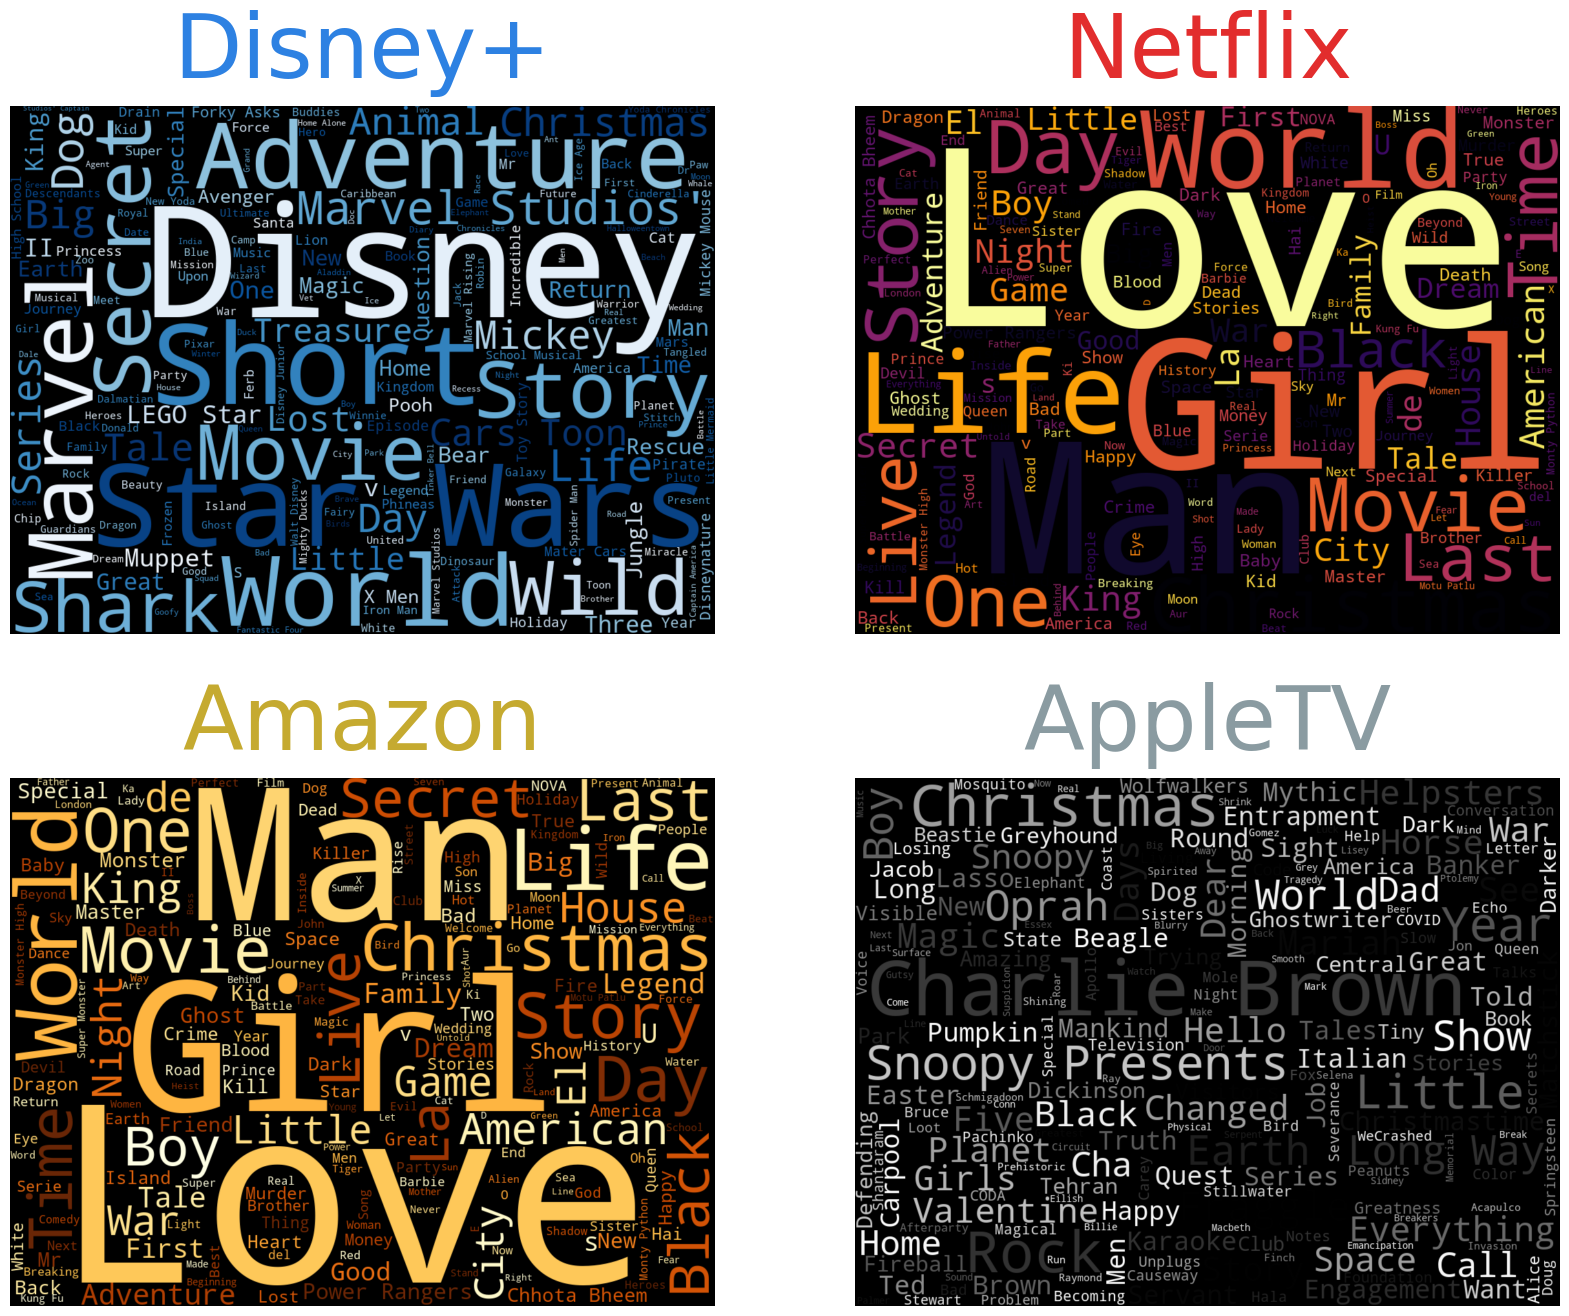

In [66]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Criando o gráfico com 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# Gerando as nuvens de palavras com temas de cores diferentes
wordcloud_disney = WordCloud(
    background_color='black',
    colormap='Blues',  # Paleta de cores azul para Disney+
    width=1024,
    height=768
).generate(" ".join(df_all[df_all['platform'] == 'disney']['title']))

wordcloud_netflix = WordCloud(
    background_color='black',
    colormap='inferno',  # Paleta de cores 'Inferno' para Netflix
    width=1024,
    height=768
).generate(" ".join(df_all[df_all['platform'] == 'netflix']['title']))

wordcloud_amazon = WordCloud(
    background_color='black',
    colormap='YlOrBr',  # Paleta de cores amarelo/marrom para Amazon
    width=1024,
    height=768
).generate(" ".join(df_all[df_all['platform'] == 'amazon']['title']))

wordcloud_apple = WordCloud(
    background_color='black',
    colormap='Greys',  # Paleta de cores cinza para AppleTV
    width=1024,
    height=768
).generate(" ".join(df_all[df_all['platform'] == 'apple']['title']))

# Plotando as nuvens de palavras
axes[0, 0].imshow(wordcloud_disney, interpolation='bilinear')
axes[0, 0].axis('off')
axes[0, 0].set_title('Disney+', color='#2d81e2', fontsize=64, pad=20)

axes[0, 1].imshow(wordcloud_netflix, interpolation='bilinear')
axes[0, 1].axis('off')
axes[0, 1].set_title('Netflix', color='#e22d2d', fontsize=64, pad=20)

axes[1, 0].imshow(wordcloud_amazon, interpolation='bilinear')
axes[1, 0].axis('off')
axes[1, 0].set_title('Amazon', color='#c5aa30', fontsize=64, pad=20)

axes[1, 1].imshow(wordcloud_apple, interpolation='bilinear')
axes[1, 1].axis('off')
axes[1, 1].set_title('AppleTV', color='#8a9ba1', fontsize=64, pad=20)

# Salvando o gráfico
plt.savefig('wordcloud_popart.png', facecolor='black')

# Mostrando o gráfico
plt.show()

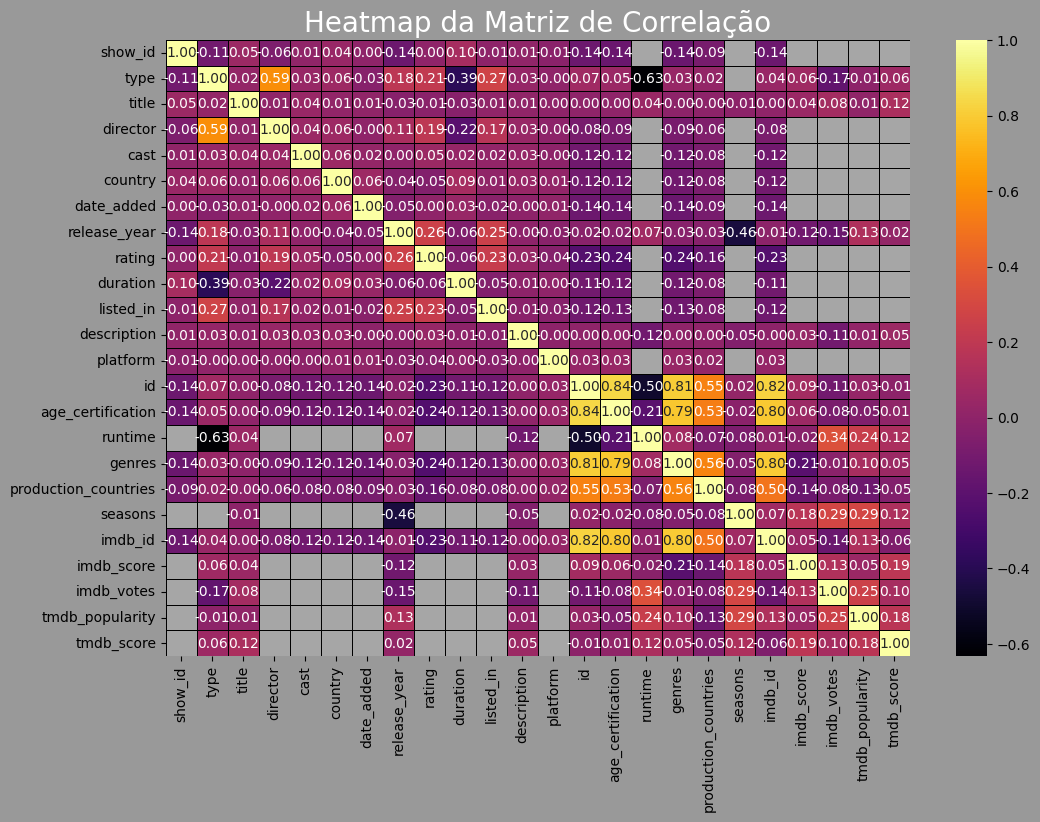

In [63]:
from sklearn.preprocessing import LabelEncoder

# Crie uma cópia do DataFrame para preservar os dados originais
df_numerical = df_all.copy()

# Transforme colunas categóricas em valores numéricos
label_encoders = {}
for column in df_numerical.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df_numerical[column] = label_encoders[column].fit_transform(df_numerical[column])

# Crie uma matriz de correlação
correlation_matrix = df_numerical.corr()

# Configurar o tamanho da figura
plt.figure(figsize=(12, 8))

# Crie o heatmap com os valores de correlação
sns.heatmap(correlation_matrix, annot=True, cmap='inferno', fmt='.2f', linewidths=.5, linecolor='black')

# Título do heatmap
plt.title('Heatmap da Matriz de Correlação', fontsize=20, color='#ffffff')

# Alterar cor de fundo e bordas
plt.gca().patch.set_facecolor('#a6a6a6')
plt.gcf().set_facecolor('#999999')

# Mostrar o heatmap
plt.show()


Correlação entre platform e release_year: -0.03
Correlação entre type e director: 0.59
Correlação entre age_certification e genres: 0.79


findfont: Font family 'Lato, sans-serif' not found.
findfont: Font family 'Lato, sans-serif' not found.
findfont: Font family 'Lato, sans-serif' not found.
findfont: Font family 'Lato, sans-serif' not found.
findfont: Font family 'Lato, sans-serif' not found.


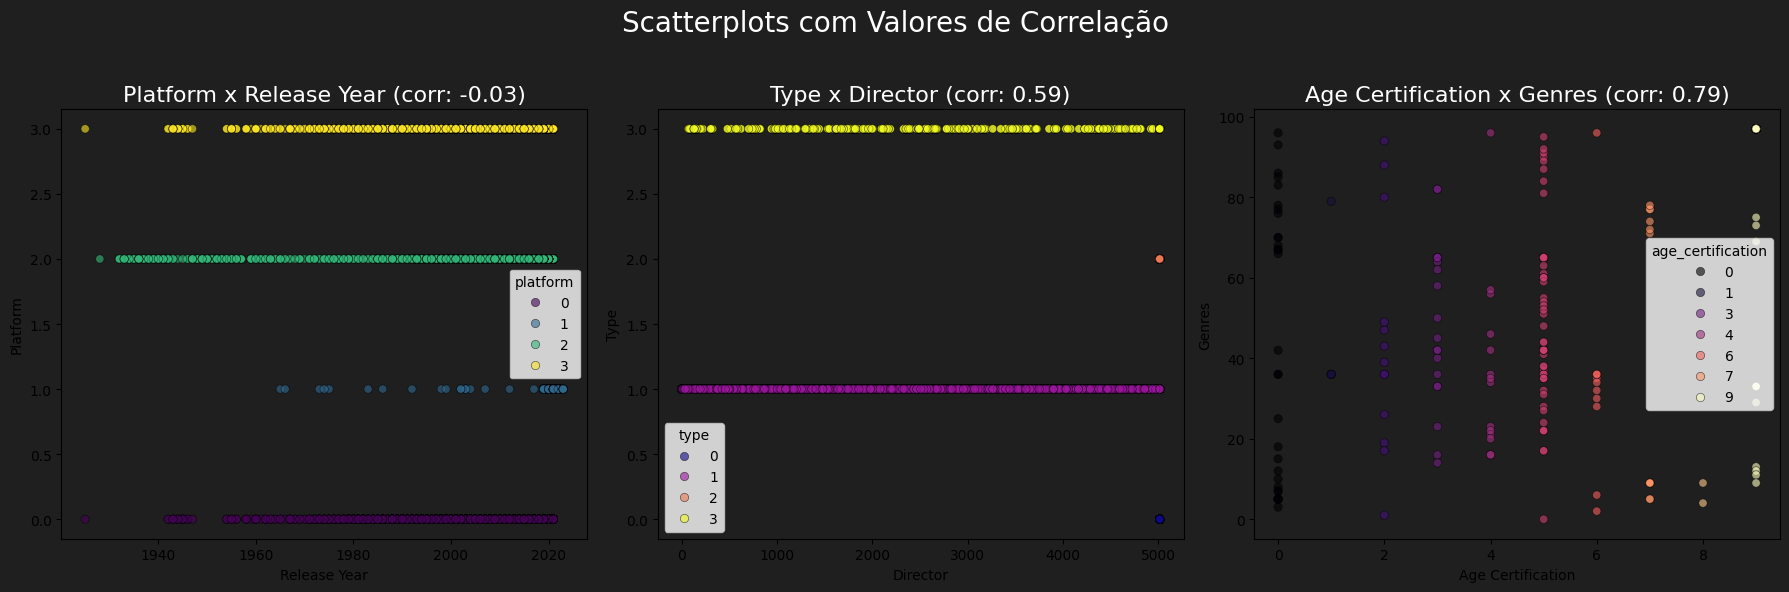

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Crie uma cópia do DataFrame para preservar os dados originais
df_numerical = df_all.copy()

# Transforme colunas categóricas em valores numéricos
label_encoders = {}
for column in ['platform', 'release_year', 'type', 'director', 'age_certification', 'genres']:
    if df_numerical[column].dtype == 'object':
        label_encoders[column] = LabelEncoder()
        df_numerical[column] = label_encoders[column].fit_transform(df_numerical[column])

# Calculando as correlações
corr_platform_release = df_numerical['platform'].corr(df_numerical['release_year'])
corr_type_director = df_numerical['type'].corr(df_numerical['director'])
corr_age_genre = df_numerical['age_certification'].corr(df_numerical['genres'])

# Verificar correlações calculadas
print(f"Correlação entre platform e release_year: {corr_platform_release:.2f}")
print(f"Correlação entre type e director: {corr_type_director:.2f}")
print(f"Correlação entre age_certification e genres: {corr_age_genre:.2f}")

# Criando gráficos de dispersão lado a lado
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Scatterplot: Platform x Release Year
sns.scatterplot(data=df_numerical, x='release_year', y='platform', hue='platform', palette='viridis', alpha=0.6, edgecolor='k', ax=axes[0])
axes[0].set_title(f'Platform x Release Year (corr: {corr_platform_release:.2f})', fontsize=16, color='#ffffff')
axes[0].set_facecolor('#1f1f1f')
axes[0].set_xlabel('Release Year')
axes[0].set_ylabel('Platform')

# Scatterplot: Type x Director
sns.scatterplot(data=df_numerical, x='director', y='type', hue='type', palette='plasma', alpha=0.6, edgecolor='k', ax=axes[1])
axes[1].set_title(f'Type x Director (corr: {corr_type_director:.2f})', fontsize=16, color='#ffffff')
axes[1].set_facecolor('#1f1f1f')
axes[1].set_xlabel('Director')
axes[1].set_ylabel('Type')

# Scatterplot: Age Certification x Genres
sns.scatterplot(data=df_numerical, x='age_certification', y='genres', hue='age_certification', palette='magma', alpha=0.6, edgecolor='k', ax=axes[2])
axes[2].set_title(f'Age Certification x Genres (corr: {corr_age_genre:.2f})', fontsize=16, color='#ffffff')
axes[2].set_facecolor('#1f1f1f')
axes[2].set_xlabel('Age Certification')
axes[2].set_ylabel('Genres')

# Configurar o layout e a cor de fundo da figura
plt.suptitle('Scatterplots com Valores de Correlação', fontsize=20, color='#ffffff', family='Lato, sans-serif')
fig.patch.set_facecolor('#1f1f1f')
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Mostrar os gráficos
plt.show()


In [14]:
import pandas as pd

# Carrega os datasets
netflix = pd.read_csv("./Datasets/netflix_titles.csv")
disney = pd.read_csv("./Datasets/disney_plus_titles.csv")
apple = pd.read_csv("./Datasets/apple_titles.csv")
amazon = pd.read_csv("./Datasets/amazon_prime_titles.csv")

# Exibe os tipos de dados dos dataframes
print("Netflix DataFrame dtypes:")
print(netflix.dtypes)

print("\nDisney+ DataFrame dtypes:")
print(disney.dtypes)

print("\nAppleTV DataFrame dtypes:")
print(apple.dtypes)

print("\nAmazonPrime DataFrame dtypes:")
print(amazon.dtypes)

print("\nAll Data dtypes:")
print(df_all.dtypes)

# Duration pode ser minutos como seasons, não dá para converter sem webscraping.

Netflix DataFrame dtypes:
show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

Disney+ DataFrame dtypes:
show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

AppleTV DataFrame dtypes:
id                       object
title                    object
type                     object
description              object
release_year              int64
age_certification        object
runtime                   int64
genres                   object
production_countries     object
seasons                 float64
imdb_id             